# LAKICA LETICIA
## M23B23/023
#### 1.Use the "HousingData.xlsx" dataset to develop a CRISP data mining pipeline.(60 Marks)

## PHASE 1: Business Understanding
#### TARGET VARIABLE - Tax(property tax)
#### Objective
##### Property tax reflects municipal valuation and correlates strongly with housing desirability, location, and quality. Accurately predicting TAX helps:

#####    - Homebuyers estimate ownership costs
#####    - Municipalities audit assessment fairness
#####    - Real estate analysts identify undervalued zones

## PHASE 2: DATA UNDERSTANDING

#### Loading dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('HousingData.xlsx')
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


##### Using Info to find out the nuber of ientries and datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


##### Using Shape to find out the number of columns and rows

In [4]:
df.shape

(506, 15)

##### Using descriptive statistics to find out the mean ,standard deviation, min and max value, count and quartiles

In [5]:
df.describe()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


#### Checking for missing values

In [6]:
df.isnull().sum()

PID        0
CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64

#### Generating a heatmap to help me choose target independent variables

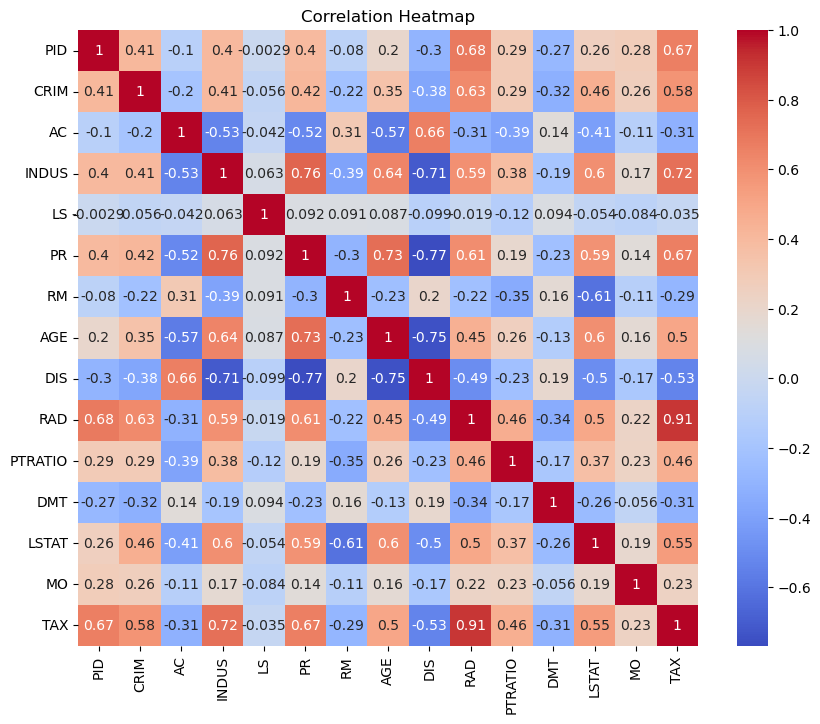

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### According to this heatmap RAD, INDUS, LSTAT, PR, CRIM, PID have the highest correlation with TAX which is my target variable

#### Checking for duplicates

In [8]:
df.duplicated().sum()

0

##### The data has no duplicates

#### Checking for outliers

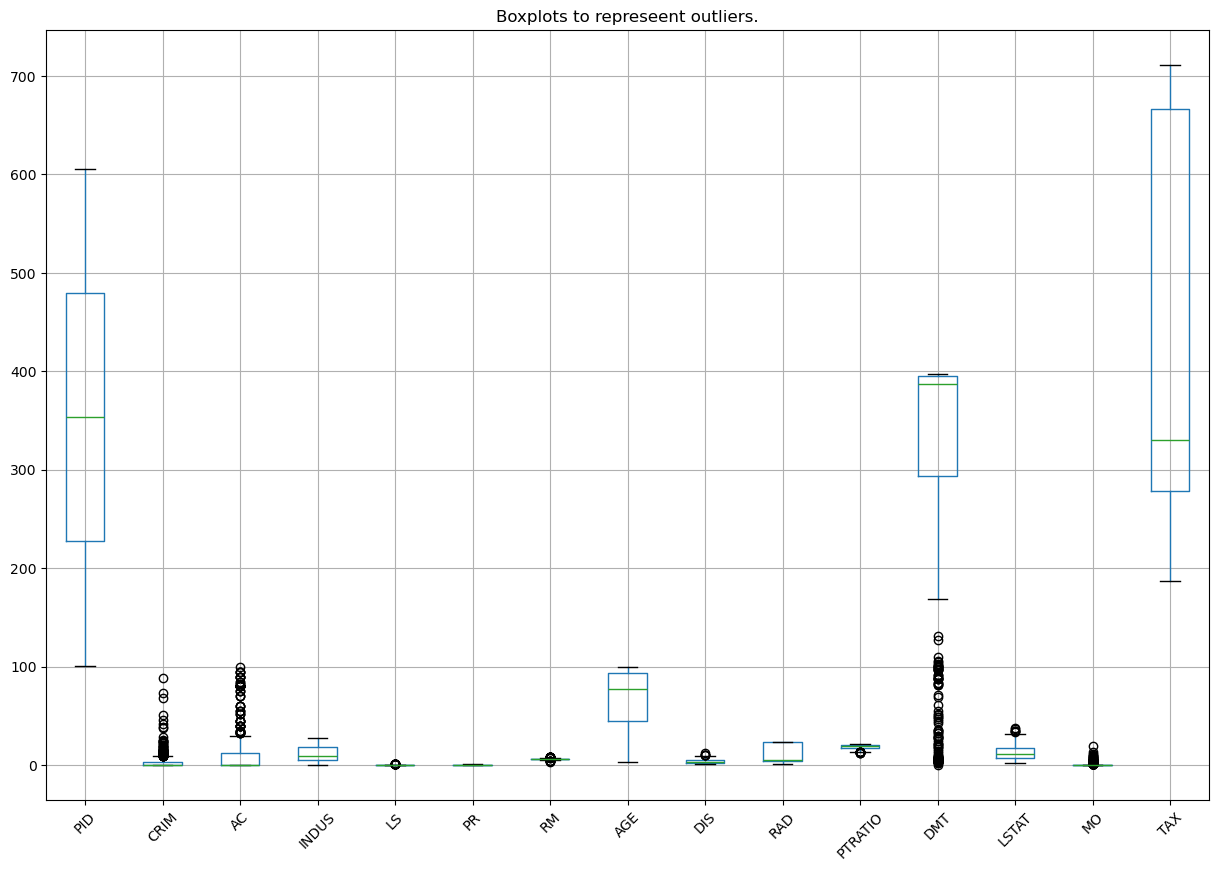

In [9]:

# Focus on skewed or extreme-prone features
cols_to_check = ['PID','CRIM','AC','INDUS','LS','PR','RM','AGE','DIS','RAD','PTRATIO','DMT','LSTAT','MO','TAX']


number_columns = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,10))
df[number_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots to represeent outliers.")
plt.show()

#### Checking whether the data is normalised

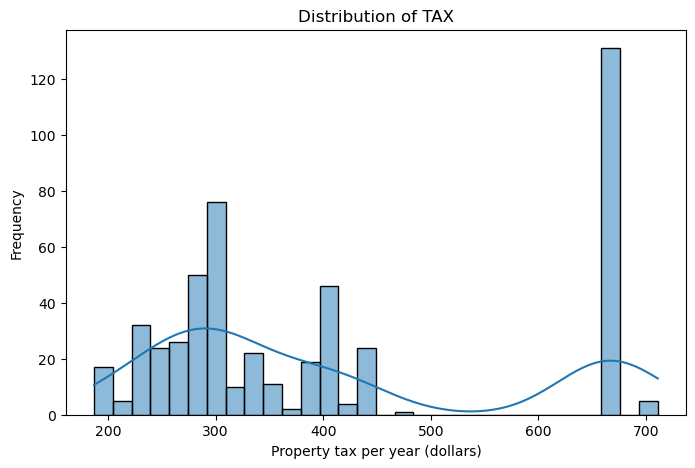

In [10]:
# Checking if the data is normalised
plt.figure(figsize=(8,5))
sns.histplot(df['TAX'], bins=30, kde=True)
plt.title("Distribution of TAX")
plt.xlabel("Property tax per year (dollars)")
plt.ylabel("Frequency")
plt.show()

##### Based on the histogram, the distribution of property taxes is strongly skewed to the right.

In [11]:
# Check skewness
skewness = df.skew().sort_values(ascending=False)
print("Skewness of columns:\n", skewness)

Skewness of columns:
 CRIM       5.231785
MO         4.891492
LS         3.397542
AC         2.225666
RAD        1.021006
DIS        1.016357
LSTAT      0.905148
PR         0.738762
TAX        0.675963
RM         0.402240
INDUS      0.295022
PID        0.000000
AGE       -0.600112
PTRATIO   -0.795056
DMT       -1.303393
dtype: float64


#### This output is a ranked list showing that most columns in the dataset are highly skewed, with features like CRIM and MO being extremely, indicating a significant deviation from a normal dstribution that needs to be addressed before modelling

### PHASE 3: DATA PREPARTION

### Imputing with median
##### Using imputation on all missing variables except my target variable where i am droping the missing value. This is because i am trying to maintain the accuracy of my model. Imputation is robust to outliers and preserves distribution

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['CRIM','LS','PR','RAD','DIS','LSTAT','MO','AGE', 'RM', 'PTRATIO', 'DMT']] = imputer.fit_transform(df[['CRIM','LS','PR','RAD','DIS','LSTAT','MO','AGE', 'RM', 'PTRATIO', 'DMT']])
df = df.dropna(subset=['TAX'])


#### Checking there are still  null values


In [13]:
df.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

#### Outlier capping 

In [14]:

# Columns identified with outliers
cols_to_clip = ["CRIM", "AC", "AGE", "DIS", "RAD", "PTRATIO", "DMT", "LSTAT", "MO"]

df = df.copy()

for col in cols_to_clip:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q1, q99)

In [15]:
from sklearn.model_selection import train_test_split
X = df[["RAD", "INDUS", "LSTAT", "PR", "CRIM", "PID"]]
y = df["TAX"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PHASE 4 : Modeling

##### Data Splitting and Scaling


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training (80%) and testing (20%) sets
# Random state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features - crucial for distance-based algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)        # Transform test data using training parameters

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Scaling applied: Mean centered and unit variance")

Training set size: (404, 6)
Testing set size: (101, 6)
Scaling applied: Mean centered and unit variance


##### Train-Test Split: Essential to evaluate model performance on unseen data and prevent overfitting

##### Why 80-20 split? Common practice that provides enough data for training while having sufficient test data

##### StandardScaler: Transforms features to have mean=0 and variance=1. Important because:

##### Algorithms like SVM and gradient descent are sensitive to feature scales

##### Prevents features with larger ranges from dominating

##### fit_transform vs transform: We fit the scaler only on training data to avoid data leakage from test set

#### Model Selection and Training

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize diverse set of models to find best performer
models = {
    'Linear Regression': LinearRegression(),  # Simple baseline
    'Ridge Regression': Ridge(alpha=1.0),     # Linear with L2 regularization
    'Lasso Regression': Lasso(alpha=0.1),     # Linear with L1 regularization (feature selection)
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),  # Ensemble method
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),  # Powerful ensemble
    'Support Vector Regression': SVR(kernel='rbf')  # Good for complex relationships
}

# Train and evaluate all models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model on scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)  # Average squared difference
    rmse = np.sqrt(mse)                       # More interpretable (same units as target)
    r2 = r2_score(y_test, y_pred)             # Proportion of variance explained
    
    results[name] = {
        'model': model,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"  {name} Results:")
    print(f"  RMSE: {rmse:.2f} (Lower is better)")
    print(f"  R² Score: {r2:.4f} (Higher is better, max 1.0)")
    print()

Training Linear Regression...
  Linear Regression Results:
  RMSE: 63.50 (Lower is better)
  R² Score: 0.8596 (Higher is better, max 1.0)

Training Ridge Regression...
  Ridge Regression Results:
  RMSE: 63.45 (Lower is better)
  R² Score: 0.8598 (Higher is better, max 1.0)

Training Lasso Regression...
  Lasso Regression Results:
  RMSE: 63.52 (Lower is better)
  R² Score: 0.8595 (Higher is better, max 1.0)

Training Random Forest...
  Random Forest Results:
  RMSE: 22.72 (Lower is better)
  R² Score: 0.9820 (Higher is better, max 1.0)

Training Gradient Boosting...
  Gradient Boosting Results:
  RMSE: 33.15 (Lower is better)
  R² Score: 0.9617 (Higher is better, max 1.0)

Training Support Vector Regression...
  Support Vector Regression Results:
  RMSE: 128.55 (Lower is better)
  R² Score: 0.4246 (Higher is better, max 1.0)



##### Multiple Models: Different algorithms have different strengths. Testing multiple helps find the best approach for this specific dataset
##### Linear Models: Good baseline, interpretable coefficients
##### Regularized Models (Ridge/Lasso): Prevent overfitting, Lasso can perform feature selection

##### Tree-based Models: Handle non-linear relationships well, robust to outliers

##### SVR: Effective for complex patterns but computationally expensive

##### RMSE vs R²:

##### RMSE: Absolute error measure in target units (dollars)

##### R²: Relative measure of how well model explains variance (0-1 scale)

#### Best Model Selection

In [18]:
# Find the best model based on R² score (primary metric)
best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']

print("="*50)
print(f"BEST MODEL SELECTION RESULTS")
print("="*50)
print(f"Best performing model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['r2']:.4f}")
print(f"RMSE: ${results[best_model_name]['rmse']:.2f}")
print(f"Interpretation: The model explains {results[best_model_name]['r2']*100:.1f}% of variance in property tax")
print(f"Average prediction error: ±${results[best_model_name]['rmse']:.2f}")

BEST MODEL SELECTION RESULTS
Best performing model: Random Forest
R² Score: 0.9820
RMSE: $22.72
Interpretation: The model explains 98.2% of variance in property tax
Average prediction error: ±$22.72


##### Why R² as primary metric? It's scale-independent and shows how well the model captures variance

##### RMSE Interpretation: Average error in dollar terms, gives practical understanding of prediction accuracy

##### Model Selection: We choose the model that balances performance and complexity

## PHASE 5: Evaluation

#### Comprehensive Model Assessment

In [19]:
from sklearn.model_selection import cross_val_score

# Cross-validation provides more robust performance estimate
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, 
                           cv=5, scoring='r2')  # 5-fold cross-validation

print("CROSS-VALIDATION RESULTS")
print(f"Individual fold R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Interpretation: Model performance is consistent across different data subsets")

# Compare with original test score
print(f"\nOriginal test R²: {results[best_model_name]['r2']:.4f}")
print(f"CV mean R²: {cv_scores.mean():.4f}")

if abs(results[best_model_name]['r2'] - cv_scores.mean()) > 0.1:
    print("Warning: Significant difference between test score and CV score")
    print("This might indicate overfitting or dataset variability")
else:
    print("Good: Test score and CV score are consistent")

CROSS-VALIDATION RESULTS
Individual fold R² scores: [0.99053721 0.98946029 0.95283881 0.97444262 0.94404635]
Mean CV R²: 0.9703 (+/- 0.0378)
Interpretation: Model performance is consistent across different data subsets

Original test R²: 0.9820
CV mean R²: 0.9703
Good: Test score and CV score are consistent


##### Cross-Validation: Splits training data into multiple folds to get more reliable performance estimate

##### Why 5-fold? Common balance between computational cost and reliability

##### Purpose: Detects overfitting and provides confidence interval for performance

##### Comparison: If CV and test scores differ significantly, might indicate issues with model stability

## PHASE 6: Deployment